In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
Weights=tf.Variable(np.random.normal(size=(784,10)),dtype=tf.float64)
bias=tf.Variable(np.zeros(shape=10))

In [6]:
x_data=tf.placeholder(tf.float64,shape=(None,784))
y_data=tf.placeholder(tf.float64,shape=(None,10))

In [7]:
y=tf.matmul(x_data,Weights) + bias

In [8]:
error=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_data,logits=y))

In [9]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(error)

In [10]:
init=tf.global_variables_initializer()

<IPython.core.display.Javascript object>


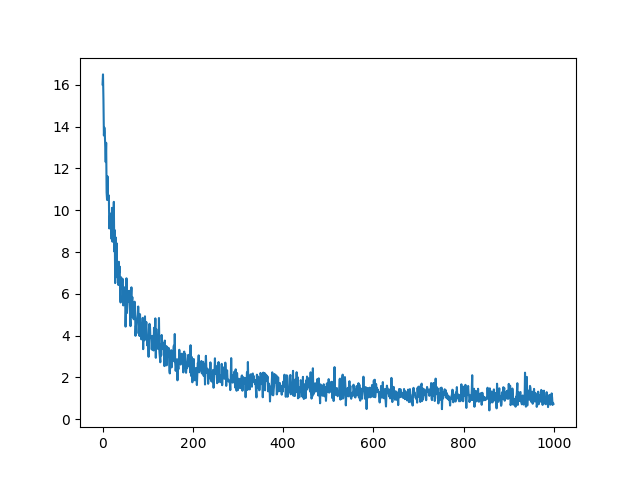

0.8109


In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
with tf.Session() as sess:
    sess.run(init)
    e=[]
    for step in range(1000):
        batch_x,batch_y=mnist.train.next_batch(100)
        feed={x_data:batch_x,y_data:batch_y}
        err=sess.run([train,error],feed_dict=feed)
        e.append(err[1])
        ax.clear()
        ax.plot(e)
        fig.canvas.draw()
    correct_pred=tf.equal(tf.argmax(y,1),tf.argmax(y_data,1))
    rate=tf.reduce_mean(tf.cast(correct_pred,dtype=tf.float32))
    acc=sess.run(rate,feed_dict={x_data:mnist.test.images,y_data:mnist.test.labels})
    print(acc)